# Classify Images of Road Traffc Signs
### Name: Luke Macdonald

### ID:  s3888490

## Table of Contents
* [Introduction](#itr)
* [Designing the Model](#design)
* [Classifying Images According to Shape](#shape)
  + [Baseline Model](#shapeB)
  + [Data Augmented Model](#shapeA)
* [Classifying Images According to Sign Type](#type)
  + [Baseline Model](#typeB)
  + [Data Augmented Model](#typeA)
* [Performance on test set (Unseen data)](#test)
* [References](#ref)

## Introduction  <a class="anchor" id="itr"></a>
### Aim of Project

The aim of this project is to complete the machine learning model building process that will be used to classify road traffic signs images according to their shape and sign type. This will be done by using a modified dataset of the Belgium Traffucc Sign Classification Benchmark dataset to train a model to be able to recognise the different types of signs. The images in the dataset are divided up in two ways, first by the shape of the sign (diamond,hex, etc) and then by the type of sign (stop, speed, etc), the purpose of this machine learning model is to be able to classify and image according to both its shape and sign type

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdUBpakcz9zspOii-Dl83pcwksmpT2RNVP6g&usqp=CAU" width = 60%>

### Sign Shapes Include:
- diamond, 
- hex, 
- rectangle, 
- round, 
- triangle.

### Sign Types Include:
- stop, 
- speed, 
- warning, 
- parking,
- rightofway,
- bicycle,
- limitedtraffic,
- noentry,
- noparking,
- roundabout,
- trafficdirective,
- trafficdirection,
- continue,
- rossing,
- laneend,
- giveway

#### Import required packages.

In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Import dataset

In [2]:
from PIL import Image
import glob
val_shapes = ['diamond', 'hex', 'round', 'square', 'triange']
image_list = []
for filepath in glob.glob('./trafficsigns_dataset/*/*/*.png', recursive=True): #assuming gif
    filename = filepath.split("/")[-1]
    shape = filepath.split("/")[-3]
    sign_type = filepath.split("/")[-2]
    label = filename.split("/")[0]
    image_list.append((filepath, shape, sign_type,filename))

In [3]:
data = pd.DataFrame(data=image_list, columns=['image_path', 'Shape', 'Type','Label'])

In [4]:
d = {'diamond':0, 'hex':1, 'round':2, 'square':3,'triangle':4}

data['shape_num'] = data['Shape'].map(d, na_action='ignore')

 
label_names = {'bicycle' : 0,'continue':1,'crossing':2,'giveway':3,'laneend':4,'limitedtraffic' : 5,'noentry' : 6,
               'noparking': 7,'parking':8,'rightofway' : 9,'roundabout':10,'speed': 11,'stop' : 12,
               'trafficdirective':13,'traveldirection':14,'warning':15}

data['type_num'] = data['Type'].map(label_names, na_action='ignore')
data

,image_path,Shape,Type,Label,shape_num,type_num
0,./trafficsigns_dataset/diamond/rightofway/0003...,diamond,rightofway,00039_00001.png,0,9
1,./trafficsigns_dataset/diamond/rightofway/0180...,diamond,rightofway,01803_00002.png,0,9
2,./trafficsigns_dataset/diamond/rightofway/0170...,diamond,rightofway,01702_00000.png,0,9
3,./trafficsigns_dataset/diamond/rightofway/0011...,diamond,rightofway,00111_00001.png,0,9
4,./trafficsigns_dataset/diamond/rightofway/0123...,diamond,rightofway,01231_00003.png,0,9
...,...,...,...,...,...,...
3694,./trafficsigns_dataset/round/trafficdirective/...,round,trafficdirective,00630_00001.png,2,13
3695,./trafficsigns_dataset/round/trafficdirective/...,round,trafficdirective,01916_00002.png,2,13
3696,./trafficsigns_dataset/round/trafficdirective/...,round,trafficdirective,00701_00002.png,2,13
3697,./trafficsigns_dataset/round/trafficdirective/...,round,trafficdirective,00465_00002.png,2,13


In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 2219, Val Data: 740, Test Data: 740


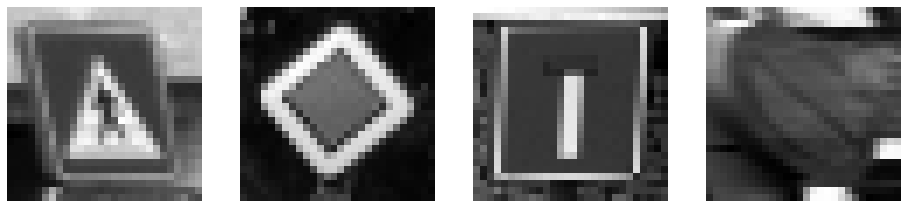

In [6]:
r_inx = np.random.choice(3000, 4)
rand_data = data.loc[r_inx,'image_path']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

## Designing the Model  <a class="anchor" id="design"></a>
A convolution neural network which is a class of neural network is the algorithm that is going to be used to train a model to be able to successfully recognise and classify an image of a road sign according to both its shape and sign type.
<img src = https://cdn.discuss.boardinfinity.com/original/2X/1/1f1bf9539699c880b33f978e724f803ef8197f6f.png width = 80%>

The CNN architectuire is made up of several layers
1. <b>Input Layer:</b> The input layer for this model is the raw pixel values of an image represented as a 3D matrix
 - Dimensions of the Matrix are $Width \times Depth \times Height$
     - Height is the number of pixels along the vertical axis
     - Width is the number of pixels along the horiztonal axis
     - Depth corresponds to the colour changes (RBG) in the image. However, for the data provided the images have been greyscaled therefore the size of their depth is one.
2. <b>Convolutional Layer</b>
3. <b>Activation Layer:</b> An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network. The activiation determines the relevancy of a given node(s) and if a node is found to be relevant by the model, than that node will "fire" after passing through the activiation function. There are multiple types of activation function:
    - ReLU
    - Sigmoid Function
    - tanh

4. <b>Pooling Layer:</b> Pooling in CNN's is used for generalizing features that have been extracted by convolutional filters and for helping the network recognize features independent of their location in the image. The method of pooling is very similar to convolution procedure itself. A filter of a certain size (for this report the size of filter is 2x2) is selected and then slide it over the output feature map of the convolution layer. There are two main types of pooling methods.
    - Max Pooling: The filter selects the maximum pixel value in the field (this is the method that is going to be used in the trained model for classifying road sign images)
    - Average Pooling: The filter calculates the average of all the pixel values in the field.

5. <b>Fully-Connected Layer:</b>


### Tuning of Hyperparameters 
The hyperparameters in the convolution layer of the CNN that will need to be tuned are the stride and padding paramters.
- Stride: Refers to the number of pixels by which the filter moves across after each operation. Stride is used in both the convoluntial and pooling operations and for these models the stride is going t be set to
- Padding
- Parameter Sharing

#### Activiation Layer
 - Filter Activations: Feature Maps
 - Activiation Function

#### Pooling Layer

#### Fully Connected Layer

In [48]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

In [40]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

## Setting Up Augmented Model
Due to the small proportion of data avaiable to train the model, a method is avaiable to make random changes to the data provided (E.g. rotating the image) to increase the diversity of the dataset. This method is called data augmentation.

Data Augmentations increase the variance of the training data in a variety of ways, including: random rotation, increase/decreasing brightness, shifting object positions, and horizontally/vertically flipping images.

# Classifying Images According to Shape  <a class="anchor" id="shape"></a>

## Baseline Model  <a class="anchor" id="shapeB"></a>

### Setting up Data Loaders

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


### Setting Up Baseline Model

In [9]:
reg_lambda = 0.001
OUTPUT_CLASSES = 5

model_Shape = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),
    
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

### Training Model

In [10]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_Shape.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history = model_Shape.fit_generator(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=100, verbose=0)

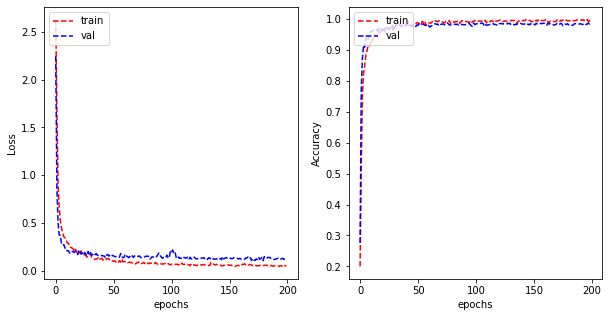

In [44]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

### Testing Model

Found 740 validated image filenames belonging to 5 classes.


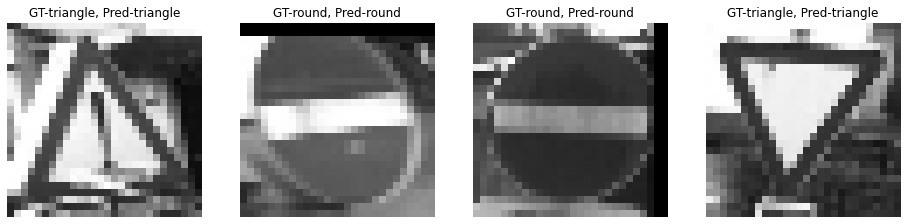

In [45]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="image_path",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

d_inv = {v: k for k, v in d.items()}

plt.figure(figsize=(16,10))

batches = 0

for x,y in test_generator:
       
        batches = batches + 1
        y_hat = model_Shape.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,4,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

## Data Augmented Model  <a class="anchor" id="shapeA"></a>

### Setting up Data Loaders

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                  rotation_range=15, width_shift_range=0.2,
                                  height_shift_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


### Setting Up Data Augmented Model

In [14]:
model_leNet_aug = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),
    
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

### Training Data Augmented Model

In [15]:
model_leNet_aug.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history = model_leNet_aug.fit_generator(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=150, verbose=0)

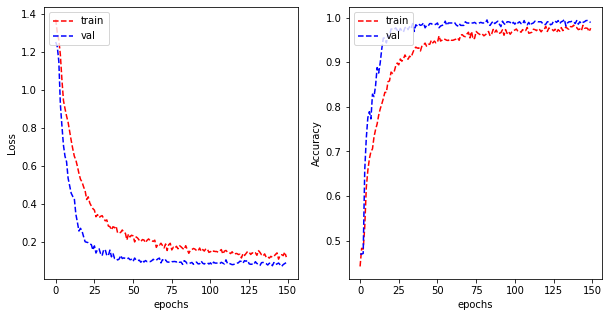

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

### Testing Model

Found 740 validated image filenames belonging to 5 classes.
{0: 'diamond', 1: 'hex', 2: 'round', 3: 'square', 4: 'triangle'}


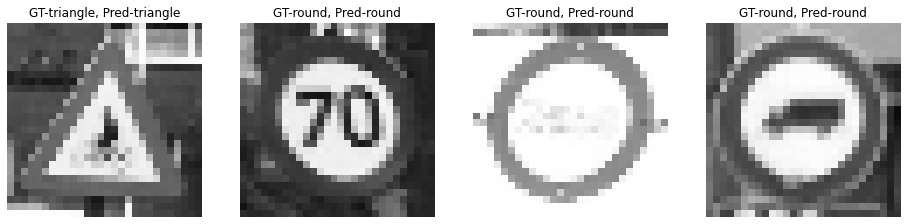

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="image_path",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

d_inv = {v: k for k, v in d.items()}
plt.figure(figsize=(16,10))

batches = 0

for x,y in test_generator:
       
        batches = batches + 1
        y_hat = model_leNet_aug.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,4,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

## Classifying Images According to Sign Type  <a class="anchor" id="type"></a>

### Setting Up Data Loaders

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')


batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


### Setting Up Base Model  <a class="anchor" id="typeB"></a>

In [19]:
reg_lambda = 0.001
OUTPUT_CLASSES = 16

model_leNet = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),
    
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

### Training Base Model

In [20]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history = model_leNet.fit_generator(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=50, verbose=0)

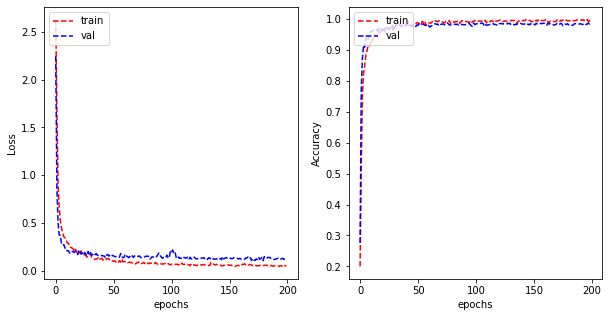

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

### Testing Model

Found 740 validated image filenames belonging to 16 classes.


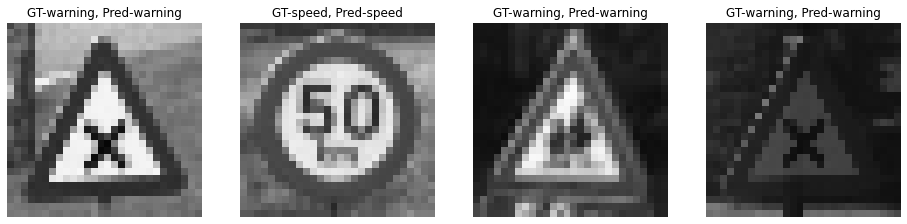

In [47]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="image_path",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

k_inv = {v: k for k, v in label_names.items()}

plt.figure(figsize=(16,10))

batches = 0

for x,y in test_generator:
       
        batches = batches + 1
        y_hat = model_leNet.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches <  5:
            plt.subplot(1,4,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(k_inv[np.argmax(y[0])], k_inv[np.argmax(y_hat[0])]))
            
        else:
            break
        
        plt.axis('off')

# Testing Models on Real World Data

# Ultimate Judgement

# References  <a class="anchor" id="ref"></a>
- https://www.google.com/url?sa=i&url=https%3A%2F%2Fdiscuss.boardinfinity.com%2Ft%2Fwhat-do-you-mean-by-convolutional-neural-network%2F8533&psig=AOvVaw0nWa2gezqj8sOleZ_ujGcD&ust=1653636797956000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCIjvnaLT_PcCFQAAAAAdAAAAABAJ
- https://www.learndatasci.com/tutorials/convolutional-neural-networks-image-classification/

In [27]:
model_Shape.save("model_Shape_Base")
model_leNet_aug.save("model_Shape_Aug")
model_leNet.save("model_Type_Base")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_Shape_Base/assets
INFO:tensorflow:Assets written to: model_Shape_Aug/assets
INFO:tensorflow:Assets written to: model_Type_Base/assets
